<a href="https://colab.research.google.com/github/swatisahoo1013/Image-Super-Resolution-Using-EDSR-And-WDSR/blob/main/Image_Super_Resolution_Using_EDSR_and_WDSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install tensorflow==2.19.0

In [ ]:
!pip install tensorflow-hub

In [ ]:
!pip install numpy matplotlib pillow

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)
print("TF Hub loaded successfully")

TensorFlow: 2.19.0
TF Hub loaded successfully


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving flower.jpeg to flower.jpeg


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
import tensorflow as tf

def load_image(path, max_size=None):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    if max_size:
        shape = tf.cast(tf.shape(img)[:-1], tf.float32)
        scale = max_size / tf.reduce_max(shape)
        new_shape = tf.cast(shape * scale, tf.int32)
        img = tf.image.resize(img, new_shape)

    return img


Perprocess Function

In [ ]:
def preprocess(img, target_size):
  img = tf.image.resize(img, target_size, method="bicubic")
  return tf.expand_dims(img, axis=0)

Inference function

In [ ]:
def resolve_single(model, lr_batch):
  sr = model(lr_batch)
  sr = tf.squeeze(sr, axis=0)
  sr = tf.clip_by_value(sr, 0.0, 1.0)
  return sr

Plot Function

In [ ]:
import matplotlib.pyplot as plt

def plot_sample(lr, sr, title):
  plt.figure(figsize=(12, 6))

  plt.subplot(1,2,1)
  plt.title("Low Resolution")
  plt.imshow(lr)
  plt.axis("off")

  plt.subplot(1,2,2)
  plt.title(title)
  plt.imshow(sr)
  plt.axis("off")

  plt.show()

Load Super-Resolution Models

In [ ]:
import tensorflow_hub as hub

edsr_model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
wdsr_model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")

print("Models loaded")


Models loaded


Load input image

(np.float64(-0.5), np.float64(149.5), np.float64(199.5), np.float64(-0.5))

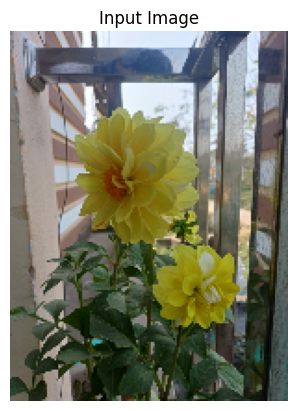

In [ ]:
lr_img = load_image(image_path, max_size=200)
plt.imshow(lr_img)
plt.title("Input Image")
plt.axis("off")


Upscaling Factor(4x)

In [ ]:
h, w = lr_img.shape[:2]
target_size = (h * 2, w * 2)


Super-Resolution(Main Login)

In [ ]:
# EDSR output
sr_edsr = resolve_single(
    edsr_model,
    preprocess(lr_img, target_size)
)

# WDSR output
sr_wdsr = resolve_single(
    wdsr_model,
    preprocess(lr_img, target_size)
)


Show reasult

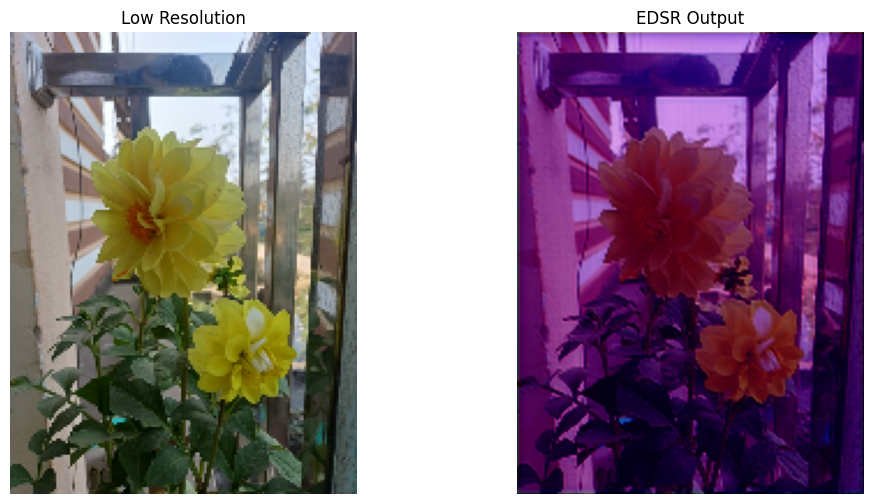

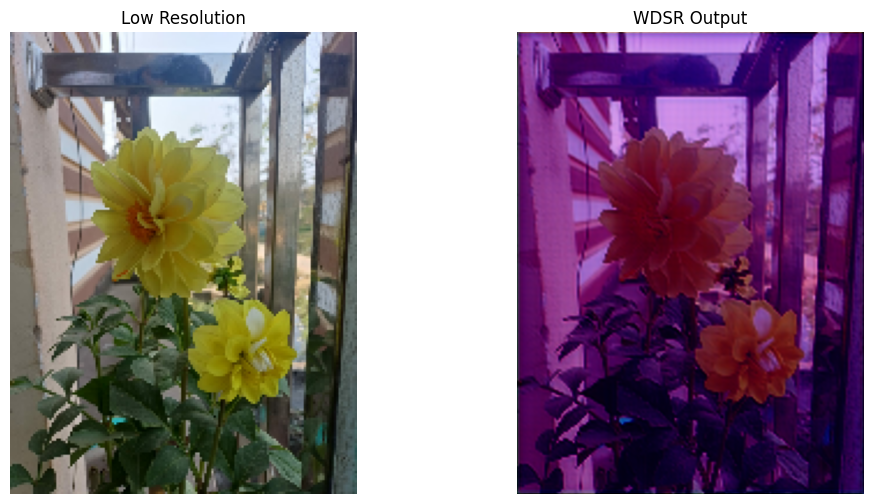

In [ ]:
plot_sample(lr_img, sr_edsr, "EDSR Output")
plot_sample(lr_img, sr_wdsr, "WDSR Output")


Save output image

In [ ]:
plt.imsave("edsr_output.png", sr_edsr.numpy())
plt.imsave("wdsr_output.png", sr_wdsr.numpy())


Download image

In [ ]:
from google.colab import files

files.download("edsr_output.png")
files.download("wdsr_output.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>